In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("decision_tree.csv")

In [6]:
df

,outlook,humidity,windy,play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,overcast,normal,weak,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rainy,normal,weak,yes


In [8]:
from sklearn.preprocessing import LabelEncoder

In [12]:
outlook = LabelEncoder()
humidity = LabelEncoder()
play = LabelEncoder()
windy = LabelEncoder()


In [13]:
df["outlook"] = outlook.fit_transform(df["outlook"])
df["humidity"] = humidity.fit_transform(df["humidity"])
df["play"]  = play.fit_transform(df["play"])
df["windy"]  = windy.fit_transform(df["windy"])

In [14]:
df

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,1,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [15]:
# seperate the dependen and independent variables
x = df[["outlook","humidity","windy"]]

In [16]:
x

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [17]:
y= df["play"]

In [18]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [19]:
# split data into training and testing data
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train

,outlook,humidity,windy
10,2,1,0
0,2,0,1
8,2,1,1
5,1,1,0
6,0,1,1
13,1,0,0
9,1,1,1
3,1,0,1
7,2,0,1
12,0,1,1


In [26]:
x_test

,outlook,humidity,windy
4,1,1,1
2,0,0,1
11,0,0,0


In [27]:
y_train

10    1
0     0
8     1
5     0
6     1
13    0
9     1
3     1
7     0
12    1
1     0
Name: play, dtype: int32

In [28]:
y_test

4     1
2     1
11    1
Name: play, dtype: int32

In [29]:
from sklearn.tree import DecisionTreeClassifier

### for criterion="gini"

In [31]:
classifier = DecisionTreeClassifier(criterion="gini")

In [32]:
# train the model
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# predict the model
classifier.predict(x_test)     # 0:no  1:yes   
     

array([1, 1, 0])

In [34]:
# check the score of model
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.5555555555555556, 0.875, 'x[1] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4

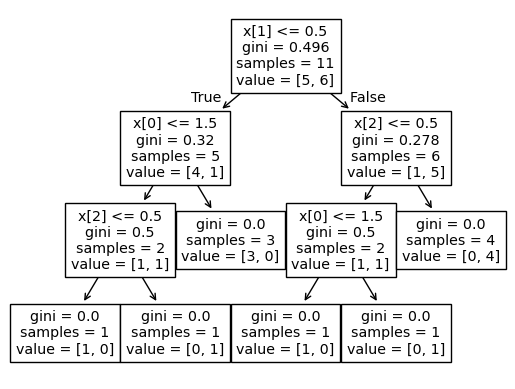

In [35]:
# decision tree

from sklearn import tree

tree.plot_tree(classifier)

### for criterion="entropy"

In [43]:
classifier1 = DecisionTreeClassifier(criterion="entropy")

In [44]:
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
classifier1.predict(x_test)

array([1, 1, 0])

In [46]:
classifier1.score(x_test,y_test)

0.6666666666666666

[Text(0.5555555555555556, 0.875, 'x[1] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'entropy 

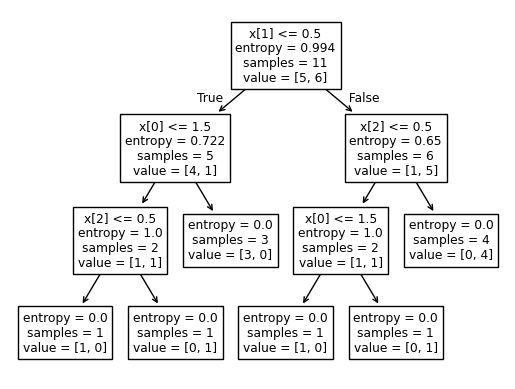

In [47]:
from sklearn import tree
tree.plot_tree(classifier1)